In [1]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
img1_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog3_1.png"
img2_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog6_2.png"


In [ ]:
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.spatial import distance
import numpy as np

# 미리 학습된 VGG16 모델 불러오기
model = VGG16(weights='imagenet', include_top=False)

# 이미지 불러오기
img1_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog1_1.png"
img1 = image.load_img(img1_path, target_size=(224, 224))
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
x1 = preprocess_input(x1)
features1 = model.predict(x1)
features1 = features1.flatten()

# 비교할 이미지가 있는 디렉토리 경로
image_dir = "/content/drive/MyDrive/yolov5/runs/detect/exp21/crops/nose"

# 특징 맵 시각화를 위한 함수
def visualize_feature_map(feature_map):
    # 특징 맵의 크기
    _, _, _, num_channels = feature_map.shape
    
    # 특징 맵 시각화
    plt.figure(figsize=(15, 15))
    for i in range(num_channels):
        plt.subplot(1, num_channels, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(feature_map[0, :, :, i], cmap='viridis')
    plt.show()


# 가장 유사도가 높은 이미지와 그 유사도를 저장할 변수
most_similar_image = None
highest_similarity = -1

for filename in os.listdir(image_dir):
    img2_path = os.path.join(image_dir, filename)

    # 디렉토리인 경우 건너뛰기
    if os.path.isdir(img2_path):
        continue
    
    # 비교할 이미지 불러오기
    img2 = image.load_img(img2_path, target_size=(224, 224))
    x2 = image.img_to_array(img2)
    x2 = np.expand_dims(x2, axis=0)
    x2 = preprocess_input(x2)
    features2 = model.predict(x2)

    # # 특징 맵 시각화
    # visualize_feature_map(features2)

    features2 = features2.flatten()
    
    # 유사도 계산
    similarity = 1 - distance.cosine(features1, features2)
    print(filename, similarity)
    
    # 현재까지 가장 높은 유사도를 가진 이미지를 저장
    if similarity > highest_similarity:
        highest_similarity = similarity
        most_similar_image = filename

print(f'Most similar image: {most_similar_image}')
print(f'Highest similarity: {highest_similarity}')


In [ ]:
import os
import pandas as pd
from tensorflow.keras.applications.efficientnet import EfficientNetB4, preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.spatial import distance
import numpy as np

# 미리 학습된 EfficientNet-B4 모델 불러오기
model = EfficientNetB4(weights='imagenet', include_top=False)

# 이미지 불러오기
img1_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog6_1.png"
img1 = image.load_img(img1_path, target_size=(380, 380))
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
x1 = preprocess_input(x1)
features1 = model.predict(x1)
features1 = features1.flatten()

# 비교할 이미지가 있는 디렉토리 경로
image_dir = "/content/drive/MyDrive/yolov5/runs/detect/exp21/crops/nose"

# 결과를 저장할 데이터프레임 생성
result_df = pd.DataFrame(columns=['filename', 'similarity'])

for filename in os.listdir(image_dir):
    img2_path = os.path.join(image_dir, filename)

    # 디렉토리인 경우 건너뛰기
    if os.path.isdir(img2_path):
        continue

    # 비교할 이미지 불러오기
    img2 = image.load_img(img2_path, target_size=(380, 380))
    x2 = image.img_to_array(img2)
    x2 = np.expand_dims(x2, axis=0)
    x2 = preprocess_input(x2)
    features2 = model.predict(x2)
    features2 = features2.flatten()
    
    # 유사도 계산
    similarity = 1 - distance.cosine(features1, features2)

    # 결과 저장
    result_df = result_df.append({'filename': filename, 'similarity': similarity}, ignore_index=True)

# 결과를 CSV 파일로 저장
result_df.to_csv('/content/drive/MyDrive/dog_nose/test_images/efficient_netresult_dog6.csv', index=False)

# 가장 유사도가 높은 이미지 찾기
most_similar_image = result_df.loc[result_df['similarity'].idxmax(), 'filename']
highest_similarity = result_df['similarity'].max()

print(f'Most similar image: {most_similar_image}')
print(f'Highest similarity: {highest_similarity}')


In [20]:
# 'similarity' 열에 따라 내림차순으로 정렬
result_df = result_df.sort_values(by='similarity', ascending=False)
result_df.to_csv('/content/drive/MyDrive/dog_nose/test_images/efficient_netresult_dog6.csv', index=False)
result_df

,filename,similarity
13,dog12_1.jpg,0.759069
17,dog12_5.jpg,0.558945
16,dog12_4.jpg,0.528663
262,dog30_5.jpg,0.497393
353,dog8_19.jpg,0.490457
...,...,...
154,dog25_14.jpg,0.011668
237,dog28_9.jpg,0.010792
244,dog29_4.jpg,0.005352
241,dog29_2.jpg,-0.015069


In [8]:
import os
from tensorflow.keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.spatial import distance
import numpy as np

# 미리 학습된 Xception 모델 불러오기
model = Xception(weights='imagenet', include_top=False)

# 이미지 불러오기
img1_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog1_1.png"
img1 = image.load_img(img1_path, target_size=(299, 299))
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
x1 = preprocess_input(x1)
features1 = model.predict(x1)
features1 = features1.flatten()

# 비교할 이미지가 있는 디렉토리 경로
image_dir = "/content/drive/MyDrive/yolov5/runs/detect/exp21/crops/nose"

# 가장 유사도가 높은 이미지와 그 유사도를 저장할 변수
most_similar_image = None
highest_similarity = -1

for filename in os.listdir(image_dir):
    img2_path = os.path.join(image_dir, filename)

    # 디렉토리인 경우 건너뛰기
    if os.path.isdir(img2_path):
        continue
    
    # 비교할 이미지 불러오기
    img2 = image.load_img(img2_path, target_size=(299, 299))
    x2 = image.img_to_array(img2)
    x2 = np.expand_dims(x2, axis=0)
    x2 = preprocess_input(x2)
    features2 = model.predict(x2)
    features2 = features2.flatten()
    
    # 유사도 계산
    similarity = 1 - distance.cosine(features1, features2)
    
    # 현재까지 가장 높은 유사도를 가진 이미지를 저장
    if similarity > highest_similarity:
        highest_similarity = similarity
        most_similar_image = filename

print(f'Most similar image: {most_similar_image}')
print(f'Highest similarity: {highest_similarity}')


1/1 [==============================] - 0s 406ms/step
Most similar image: dog7_3.jpg
Highest similarity: 0.5253257155418396


In [ ]:
import os
from tensorflow.keras.applications.densenet import DenseNet121, preprocess_input
from tensorflow.keras.preprocessing import image
from scipy.spatial import distance
import numpy as np

# 미리 학습된 DenseNet121 모델 불러오기
model = DenseNet121(weights='imagenet', include_top=False)

# 이미지 불러오기
img1_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_2.png"
img1 = image.load_img(img1_path, target_size=(224, 224))
x1 = image.img_to_array(img1)
x1 = np.expand_dims(x1, axis=0)
x1 = preprocess_input(x1)
features1 = model.predict(x1)
features1 = features1.flatten()

# 비교할 이미지가 있는 디렉토리 경로
image_dir = "/content/drive/MyDrive/dog_nose/test_images/nose"

# 가장 유사도가 높은 이미지와 그 유사도를 저장할 변수
most_similar_image = None
highest_similarity = -1

for filename in os.listdir(image_dir):
    img2_path = os.path.join(image_dir, filename)

    # 디렉토리인 경우 건너뛰기
    if os.path.isdir(img2_path):
        continue
    
    # 비교할 이미지 불러오기
    img2 = image.load_img(img2_path, target_size=(224, 224))
    x2 = image.img_to_array(img2)
    x2 = np.expand_dims(x2, axis=0)
    x2 = preprocess_input(x2)
    features2 = model.predict(x2)
    features2 = features2.flatten()
    
    # 유사도 계산
    similarity = 1 - distance.cosine(features1, features2)
    print(similarity)
    # 현재까지 가장 높은 유사도를 가진 이미지를 저장
    if similarity > highest_similarity:
        highest_similarity = similarity
        most_similar_image = filename

print(f'Most similar image: {most_similar_image}')
print(f'Highest similarity: {highest_similarity}')


1/1 [==============================] - 0s 191ms/step
0.38049083948135376
1/1 [==============================] - 0s 197ms/step
0.4346827566623688
1/1 [==============================] - 0s 218ms/step
0.38307303190231323
1/1 [==============================] - 0s 212ms/step
0.5265436768531799
Most similar image: dog6_1.png
Highest similarity: 0.5265436768531799


1/1 [==============================] - 1s 709ms/step


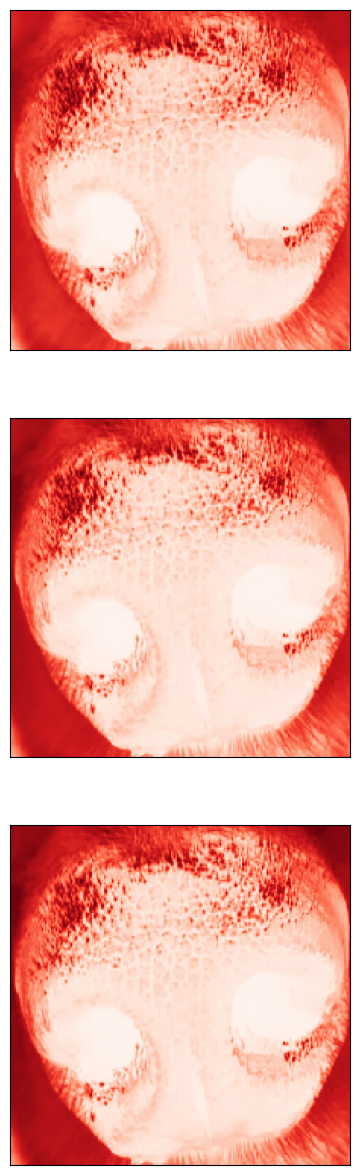

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# VGG16 모델 불러오기
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)

# 중간 계층의 출력을 리스트로 가져오기
layer_outputs = [layer.output for layer in base_model.layers]

# 중간 계층의 출력을 사용하는 모델 생성
model = Model(inputs=base_model.input, outputs=layer_outputs)

# 이미지를 VGG16 모델이 학습된 데이터셋의 분포에 맞게 전처리
img = tf.keras.preprocessing.image.load_img(img1_path, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.vgg16.preprocess_input(img)

# 이미지에서 특징 맵 생성
feature_maps = model.predict(img)

# 첫 번째 특징 맵의 채널 수를 가져오기
num_channels = feature_maps[0].shape[-1]

# 첫 번째 특징 맵을 시각화
plt.figure(figsize=(15, 15))
for i in range(num_channels):
    plt.subplot(num_channels, 1, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(feature_maps[0][0, :, :, i], cmap='Reds')
plt.show()


1/1 [==============================] - 1s 1s/step


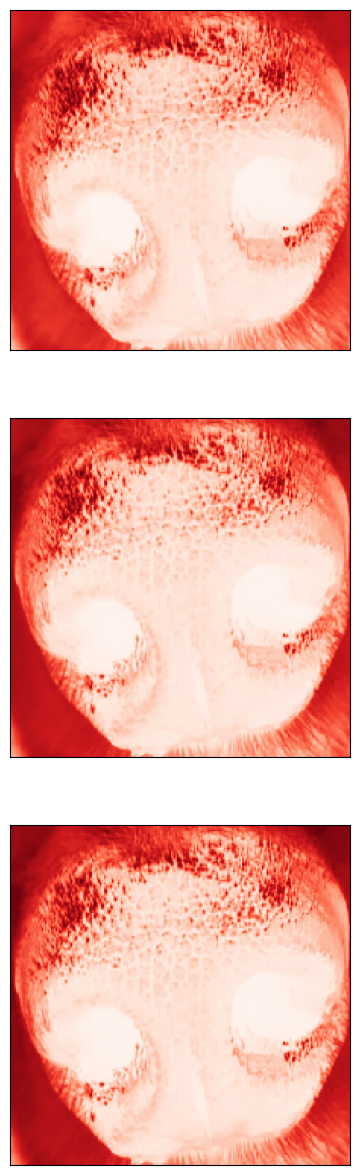

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# VGG16 모델 불러오기
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)

# 중간 계층의 출력을 리스트로 가져오기
layer_outputs = [layer.output for layer in base_model.layers]

# 중간 계층의 출력을 사용하는 모델 생성
model = Model(inputs=base_model.input, outputs=layer_outputs)

# 이미지를 VGG16 모델이 학습된 데이터셋의 분포에 맞게 전처리
img = tf.keras.preprocessing.image.load_img(img3_path, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.vgg16.preprocess_input(img)

# 이미지에서 특징 맵 생성
feature_maps = model.predict(img)

# 첫 번째 특징 맵의 채널 수를 가져오기
num_channels = feature_maps[0].shape[-1]

# 첫 번째 특징 맵을 시각화
plt.figure(figsize=(15, 15))
for i in range(num_channels):
    plt.subplot(num_channels, 1, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(feature_maps[0][0, :, :, i], cmap='Reds')
plt.show()


1/1 [==============================] - 1s 693ms/step


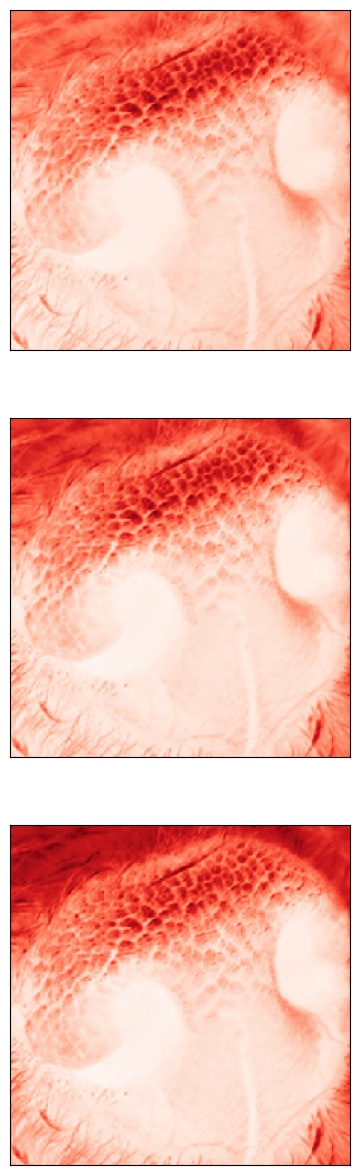

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

# VGG16 모델 불러오기
base_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)

# 중간 계층의 출력을 리스트로 가져오기
layer_outputs = [layer.output for layer in base_model.layers]

# 중간 계층의 출력을 사용하는 모델 생성
model = Model(inputs=base_model.input, outputs=layer_outputs)

# 이미지를 VGG16 모델이 학습된 데이터셋의 분포에 맞게 전처리
img = tf.keras.preprocessing.image.load_img(img4_path, target_size=(224, 224))
img = tf.keras.preprocessing.image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = tf.keras.applications.vgg16.preprocess_input(img)

# 이미지에서 특징 맵 생성
feature_maps = model.predict(img)

# 첫 번째 특징 맵의 채널 수를 가져오기
num_channels = feature_maps[0].shape[-1]

# 첫 번째 특징 맵을 시각화
plt.figure(figsize=(15, 15))
for i in range(num_channels):
    plt.subplot(num_channels, 1, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(feature_maps[0][0, :, :, i], cmap='Reds')
plt.show()


In [ ]:
result = DeepFace.verify(enforce_detection = False, 
                         img1_path = "/content/drive/MyDrive/dog_nose/test_images/dog4_1.PNG", 
                         img2_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_1.jpg",
                         distance_metric = metrics[0]
                         )
print(result)

{'verified': True, 'distance': 0.304073417392665, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 1125, 'h': 1364}, 'img2': {'x': 0, 'y': 0, 'w': 828, 'h': 1104}}, 'time': 5.79}


In [ ]:
result = DeepFace.verify(enforce_detection = False, 
                         img1_path = "/content/drive/MyDrive/dog_nose/test_images/dog5_1.PNG", 
                         img2_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_1.jpg",
                         distance_metric = metrics[0]
                         )
print(result)

{'verified': True, 'distance': 0.31550812346341794, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 937, 'h': 1052}, 'img2': {'x': 0, 'y': 0, 'w': 828, 'h': 1104}}, 'time': 5.44}


In [ ]:
result = DeepFace.verify(enforce_detection = False, 
                         img1_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_2.jpg", 
                         img2_path = "/content/drive/MyDrive/dog_nose/test_images/dog6_1.jpg",
                         distance_metric = metrics[0]
                         )
print(result)

{'verified': True, 'distance': 0.10118514769903253, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 828, 'h': 1104}, 'img2': {'x': 0, 'y': 0, 'w': 828, 'h': 1104}}, 'time': 4.32}


In [ ]:
result = DeepFace.verify(enforce_detection = False, 
                         img1_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog6_2.png", 
                         img2_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog6_1.png",
                         distance_metric = metrics[2]
                         )
print(result)

{'verified': True, 'distance': 0.14464666874218612, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 268, 'h': 192}, 'img2': {'x': 0, 'y': 0, 'w': 362, 'h': 362}}, 'time': 1.28}


In [ ]:
result = DeepFace.verify(enforce_detection = False, img1_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog6_2.png", img2_path = "/content/drive/MyDrive/dog_nose/test_images/nose/dog6_1.png")

In [ ]:
print(result)

{'verified': True, 'distance': 0.057913203131070734, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 0, 'y': 0, 'w': 408, 'h': 418}, 'img2': {'x': 0, 'y': 0, 'w': 362, 'h': 362}}, 'time': 1.34}


In [ ]:
!pwd

/content/drive/MyDrive/deepface
